In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

pd.set_option('mode.chained_assignment', None)

In [2]:
rcParams['figure.figsize'] = 12, 8
rcParams['figure.titlesize'] = 15
rcParams['font.size'] = 15
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

In [3]:
cols =[
    'município', 
    'seção',
    'categoria',
    'graudeinstrução',
    'sexo',
    'tipomovimentação',
    'raçacor',
]
newcols=[
    'municipio',
    'secao',
    'categoria',
    'instrucao',
    'genero',
    'tipo',
    'raca'
]
a = list(string.ascii_uppercase)
del(a[21:25] )
genero = ['M','F','N/I']
secao = [
    'Agricultura/Pecuária',
    'Ind. Extrativas',
    'Ind. Transformação',
    'Eletricidade/Gás',
    'Água/Esgoto',
    'Construção',
    'Comércio',
    'Transporte',
    'Alimentação',
    'Informação',
    'Financeiros',
    'Imobiliárias',
    'Profissionais',
    'Administrativas',
    'Adm Pública',
    'Educação',
    'Saúde',
    'Artes/Cultura',
    'Outros Serviços',
    'Domésticos',
    'Org. Internacionais',
    'Não Identificados',
]
mon = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov']

In [4]:
[secao[e] for e in range(0,22)]


['Agricultura/Pecuária',
 'Ind. Extrativas',
 'Ind. Transformação',
 'Eletricidade/Gás',
 'Água/Esgoto',
 'Construção',
 'Comércio',
 'Transporte',
 'Alimentação',
 'Informação',
 'Financeiros',
 'Imobiliárias',
 'Profissionais',
 'Administrativas',
 'Adm Pública',
 'Educação',
 'Saúde',
 'Artes/Cultura',
 'Outros Serviços',
 'Domésticos',
 'Org. Internacionais',
 'Não Identificados']

In [5]:
jan = pd.read_csv('datasets/2020/CAGEDMOV202001.txt', sep=';', usecols=cols)
fev = pd.read_csv('datasets/2020/CAGEDMOV202002.txt', sep=';', usecols=cols)
mar = pd.read_csv('datasets/2020/CAGEDMOV202003.txt', sep=';', usecols=cols)
abr = pd.read_csv('datasets/2020/CAGEDMOV202004.txt', sep=';', usecols=cols)
mai = pd.read_csv('datasets/2020/CAGEDMOV202005.txt', sep=';', usecols=cols)
jun = pd.read_csv('datasets/2020/CAGEDMOV202006.txt', sep=';', usecols=cols)
jul = pd.read_csv('datasets/2020/CAGEDMOV202007.txt', sep=';', usecols=cols)
ago = pd.read_csv('datasets/2020/CAGEDMOV202008.txt', sep=';', usecols=cols)
set_ = pd.read_csv('datasets/2020/CAGEDMOV202009.txt', sep=';', usecols=cols)
out = pd.read_csv('datasets/2020/CAGEDMOV202010.txt', sep=';', usecols=cols)
nov = pd.read_csv('datasets/2020/CAGEDMOV202011.txt', sep=';', usecols=cols)

In [6]:
data = [jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov]
def rename(df):
    for i in range(len(df)):
    
        df[i].rename(columns=dict(zip(cols, newcols)), inplace=True)
        df[i] = df[i].loc[data[i]['municipio']==410690]
        
        df[i].loc[df[i]['genero']==1,'genero'] = 'M'
        df[i].loc[df[i]['genero']==3,'genero'] = 'F'
        df[i].loc[df[i]['genero']==9,'genero'] = 'N/I'
        
        df[i].loc[df[i]['secao']=='A','secao'] = 'Agricultura/Pecuária'
        df[i].loc[df[i]['secao']=='B','secao'] = 'Ind. Extrativas'
        df[i].loc[df[i]['secao']=='C','secao'] = 'Ind. Transformação'
        df[i].loc[df[i]['secao']=='D','secao'] = 'Eletricidade/Gás'
        df[i].loc[df[i]['secao']=='E','secao'] = 'Água/Esgoto'
        df[i].loc[df[i]['secao']=='F','secao'] = 'Construção'
        df[i].loc[df[i]['secao']=='G','secao'] = 'Comércio'
        df[i].loc[df[i]['secao']=='H','secao'] = 'Transporte'
        df[i].loc[df[i]['secao']=='I','secao'] = 'Alimentação'
        df[i].loc[df[i]['secao']=='J','secao'] = 'Informação'
        df[i].loc[df[i]['secao']=='K','secao'] = 'Financeiros'
        df[i].loc[df[i]['secao']=='L','secao'] = 'Imobiliárias'
        df[i].loc[df[i]['secao']=='M','secao'] = 'Profissionais'
        df[i].loc[df[i]['secao']=='N','secao'] = 'Administrativas'
        df[i].loc[df[i]['secao']=='O','secao'] = 'Adm Pública'
        df[i].loc[df[i]['secao']=='P','secao'] = 'Educação'
        df[i].loc[df[i]['secao']=='Q','secao'] = 'Saúde'
        df[i].loc[df[i]['secao']=='R','secao'] = 'Artes/Cultura'
        df[i].loc[df[i]['secao']=='S','secao'] = 'Outros Serviços'
        df[i].loc[df[i]['secao']=='T','secao'] = 'Domésticos'
        df[i].loc[df[i]['secao']=='U','secao'] = 'Org. Internacionais'
        df[i].loc[df[i]['secao']=='Z','secao'] = 'Não Identificados'
        
        df[i].loc[df[i]['categoria']==101,'categoria'] = 'CLT'
        df[i].loc[df[i]['categoria']==102,'categoria'] = 'Trab. Rural'
        df[i].loc[df[i]['categoria']==103,'categoria'] = 'Aprendiz'
        df[i].loc[df[i]['categoria']==104,'categoria'] = 'Doméstico'
        df[i].loc[df[i]['categoria']==105,'categoria'] = 'Contrato a Termo'
        df[i].loc[df[i]['categoria']==106,'categoria'] = 'Temporário'
        df[i].loc[df[i]['categoria']==107,'categoria'] = 'VA/Sem acordo'
        df[i].loc[df[i]['categoria']==108,'categoria'] = 'VA/Com acordo'
        df[i].loc[df[i]['categoria']==111,'categoria'] = 'Intermitente'
        df[i].loc[df[i]['categoria']==999,'categoria'] = 'Não Identificado'
        
        df[i].loc[df[i]['instrucao']==1,'instrucao'] = 'Analfabeto'
        df[i].loc[df[i]['instrucao']==2,'instrucao'] = '5º Incompleto'
        df[i].loc[df[i]['instrucao']==3,'instrucao'] = '5º Fundamental'
        df[i].loc[df[i]['instrucao']==4,'instrucao'] = '6º a 9º Fundamental'
        df[i].loc[df[i]['instrucao']==5,'instrucao'] = 'Fundamental Completo'
        df[i].loc[df[i]['instrucao']==6,'instrucao'] = 'Médio Incompleto'
        df[i].loc[df[i]['instrucao']==7,'instrucao'] = 'Médio Completo'
        df[i].loc[df[i]['instrucao']==8,'instrucao'] = 'Superior Incompleto'
        df[i].loc[df[i]['instrucao']==9,'instrucao'] = 'Superior Completo'
        df[i].loc[df[i]['instrucao']==10,'instrucao'] = 'Mestrado'
        df[i].loc[df[i]['instrucao']==11,'instrucao'] = 'Doutorado'
        df[i].loc[df[i]['instrucao']==80,'instrucao'] = 'Pós Graduação Completa'
        df[i].loc[df[i]['instrucao']==99,'instrucao'] = 'Não Identificado'
        
        df[i].loc[df[i]['raca']==1,'raca'] = 'Branca'
        df[i].loc[df[i]['raca']==2,'raca'] = 'Preta'
        df[i].loc[df[i]['raca']==3,'raca'] = 'Parda'
        df[i].loc[df[i]['raca']==4,'raca'] = 'Amarela'
        df[i].loc[df[i]['raca']==5,'raca'] = 'Indígena'
        df[i].loc[df[i]['raca']==6,'raca'] = 'Não Informada'
        df[i].loc[df[i]['raca']==9,'raca'] = 'Não Identificado'
        
        df[i].loc[data[i]['tipo'] == 10, 'descricao'] = 'ADM/Primeiro Emprego'
        df[i].loc[data[i]['tipo'] == 20, 'descricao'] = 'ADM/Reemprego'
        df[i].loc[data[i]['tipo'] == 25, 'descricao'] = 'ADM/Prazo Determinado'
        df[i].loc[data[i]['tipo'] == 31, 'descricao'] = 'DES/Sem Justa Causa'
        df[i].loc[data[i]['tipo'] == 32, 'descricao'] = 'DES/Justa Causa'
        df[i].loc[data[i]['tipo'] == 33, 'descricao'] = 'DES/Culpa Recíproca'
        df[i].loc[data[i]['tipo'] == 35, 'descricao'] = 'ADM/Reintegração'
        df[i].loc[data[i]['tipo'] == 40, 'descricao'] = 'DES/A pedido'
        df[i].loc[data[i]['tipo'] == 43, 'descricao'] = 'DES/Término de Contrato Determinado'
        df[i].loc[data[i]['tipo'] == 45, 'descricao'] = 'DES/Término de Contrato'
        df[i].loc[data[i]['tipo'] == 50, 'descricao'] = 'DES/Aposentadoria'
        df[i].loc[data[i]['tipo'] == 60, 'descricao'] = 'DES/Morte'
        df[i].loc[data[i]['tipo'] == 70, 'descricao'] = 'ADM/Transferência'
        df[i].loc[data[i]['tipo'] == 80, 'descricao'] = 'DES/Transferência'
        df[i].loc[data[i]['tipo'] == 90, 'descricao'] = 'DES/Acordo'
        df[i].loc[data[i]['tipo'] == 98, 'descricao'] = 'DES/Tipo Ignorado'
        df[i].loc[data[i]['tipo'] == 99, 'descricao'] = 'DES/Não Identificado'
        
        
def select_list(list_, var, ind):  
   
    for i in range(len(data)):
        a = data[i][data[i][var].str.contains(ind, regex=False)].groupby([var]).size()
        list_.append(a)
    


In [7]:
rename(data)

In [8]:
data[0]

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa
...,...,...,...,...,...,...,...,...
2617203,410690,Alimentação,CLT,Fundamental Completo,M,20,Branca,ADM/Reemprego
2617230,410690,Administrativas,Temporário,Médio Completo,M,43,Não Informada,DES/Término de Contrato Determinado
2617252,410690,Ind. Transformação,Não Identificado,Médio Completo,F,20,Branca,ADM/Reemprego
2617268,410690,Administrativas,Contrato a Termo,Médio Completo,M,40,Branca,DES/A pedido


## Dados de Admissões

In [10]:
adm = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].shape[0]
    adm.append(d)



In [11]:
adm = pd.DataFrame(adm, index=mon, columns=['admissoes'])
adm

,admissoes
jan,32248
fev,39458
mar,29448
abr,12833
mai,16756
jun,21587
jul,25648
ago,26732
set,30159
out,39565


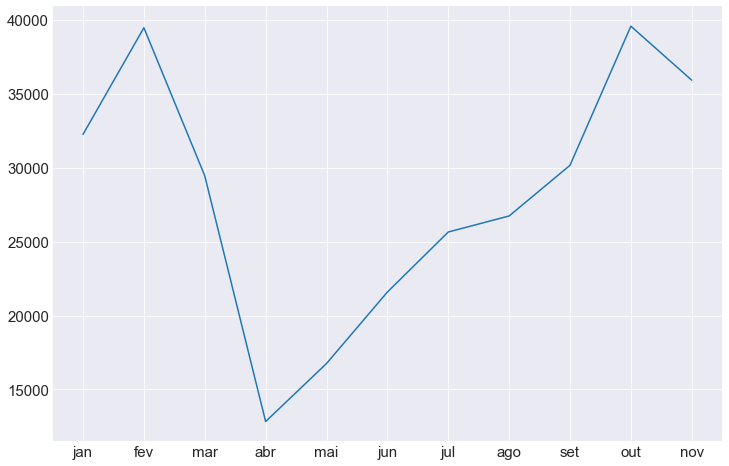

In [223]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(adm)
    plt.show()

## Dados de Desligamentos

In [12]:
des = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].shape[0]
    des.append(d)


In [13]:
des = pd.DataFrame(des, index=mon, columns=['desligamentos'])
des

,desligamentos
jan,26336
fev,29711
mar,40489
abr,32906
mai,25380
jun,21474
jul,22344
ago,23776
set,26270
out,27959


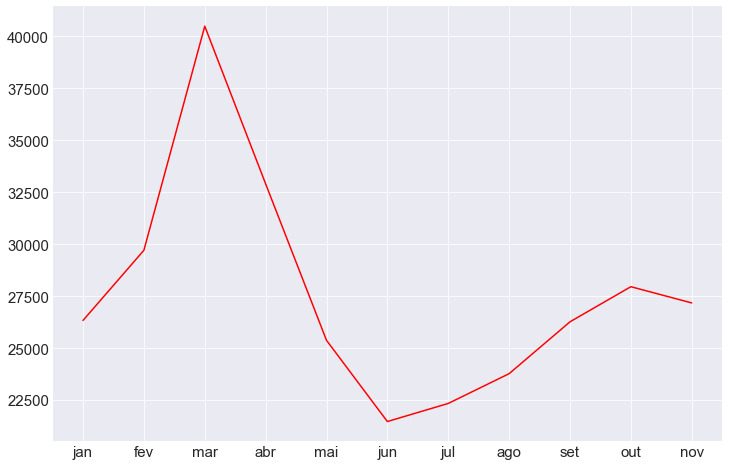

In [21]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(des, color='red')
    plt.show()

# Admissões/Desligamentos

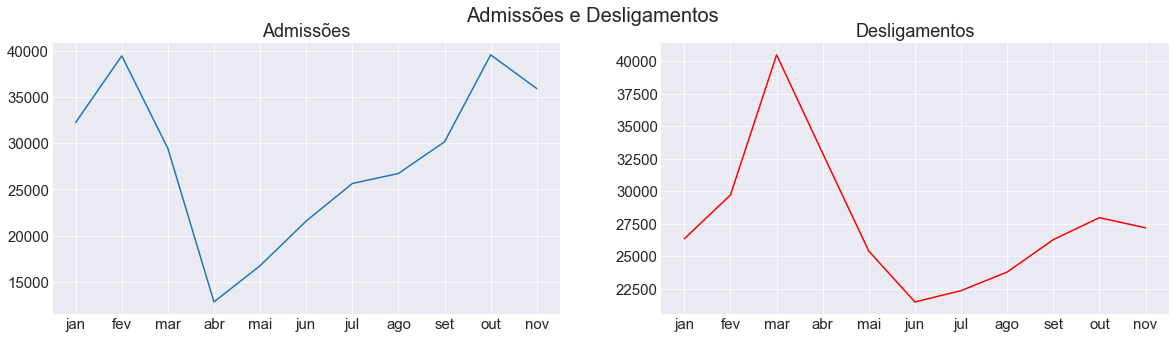

In [22]:
with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(1, 2, figsize = (20, 5))

    axes[0].plot(adm)
    axes[0].set_title("Admissões")
    #axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

    axes[1].plot(des, color='r')
    axes[1].axis('tight')
    axes[1].set_title("Desligamentos")
    #axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    
    fig.suptitle("Admissões e Desligamentos", fontsize=20)
    plt.show()

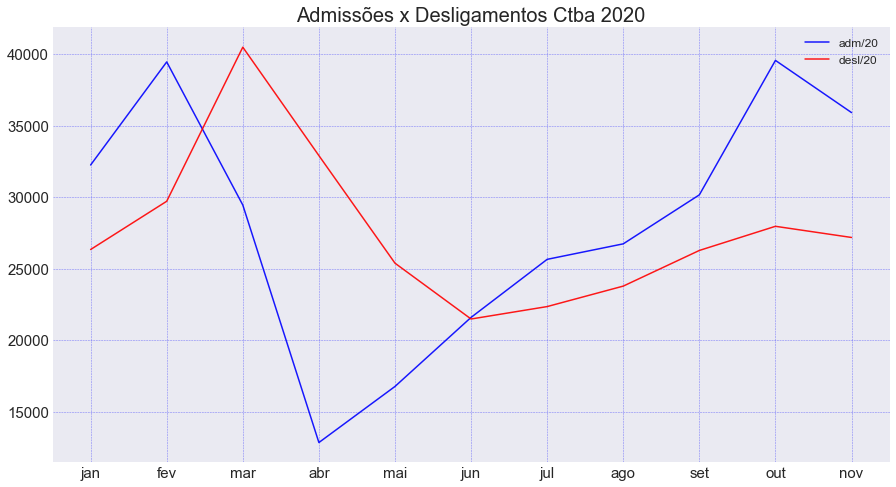

In [26]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(adm, color="b", alpha=0.9)
    ax.plot(des, color="r", alpha=0.9)
    ax.set_title("Admissões x Desligamentos Ctba 2020", fontsize=20)
    ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.legend(('adm/20', 'desl/20'), fontsize=12)
    #plt.rcParams['figure.figsize'] = (8,5)
    plt.show();

In [14]:
adm_des = adm.join(des)
adm_des.desligamentos.values

array([26336, 29711, 40489, 32906, 25380, 21474, 22344, 23776, 26270,
       27959, 27178], dtype=int64)

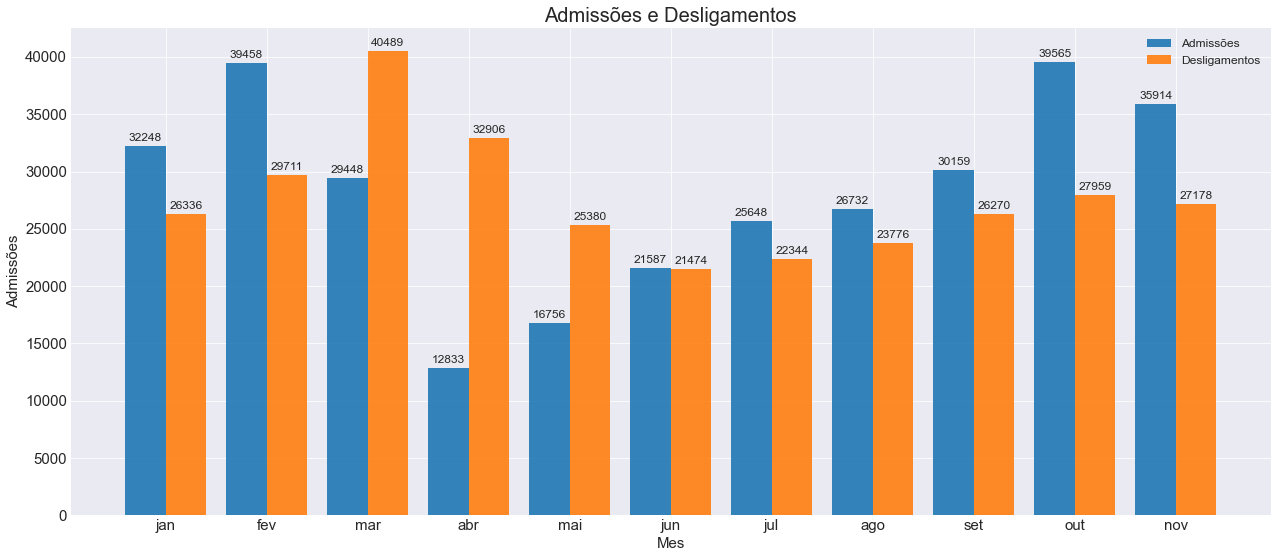

In [62]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4
        
    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, adm_des.admissoes.values, width, label='Admissões', alpha=0.9)
    rects2 = ax.bar(x+width/2, adm_des.desligamentos.values, width, label='Desligamentos', alpha=0.9)
    
    ax.set_ylabel('Admissões')
    ax.set_title('Admissões e Desligamentos', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon)
    ax.legend(fontsize=12)
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=12,
                        ha='center',
                        va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

# Criar Gráfico com Diferença entre Admissões e Desligamentos
---

In [15]:
diff= (adm.values)-(des.values) 
diff

array([[  5912],
       [  9747],
       [-11041],
       [-20073],
       [ -8624],
       [   113],
       [  3304],
       [  2956],
       [  3889],
       [ 11606],
       [  8736]], dtype=int64)

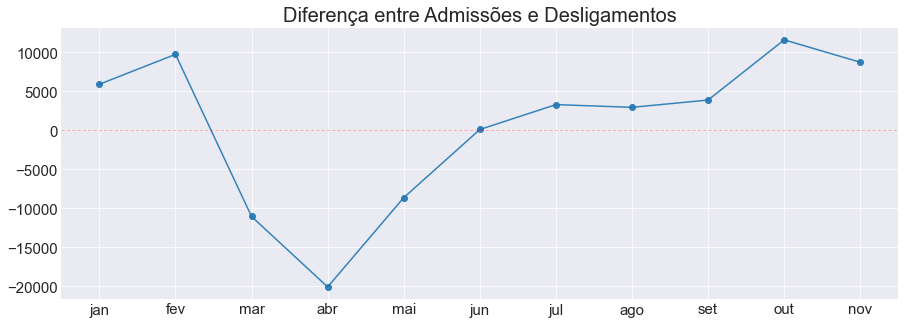

In [31]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(mon, diff, marker='o', alpha=0.9)
    ax.axhline(0, color='red', lw=1, ls='--', alpha=0.3)
    plt.title('Diferença entre Admissões e Desligamentos', fontsize=20)
     
    plt.show()

In [16]:
df_diff = pd.DataFrame(diff, index=mon, columns=['diferenca'])
df_diff

,diferenca
jan,5912
fev,9747
mar,-11041
abr,-20073
mai,-8624
jun,113
jul,3304
ago,2956
set,3889
out,11606


# Arrumar este Gráfico 
---

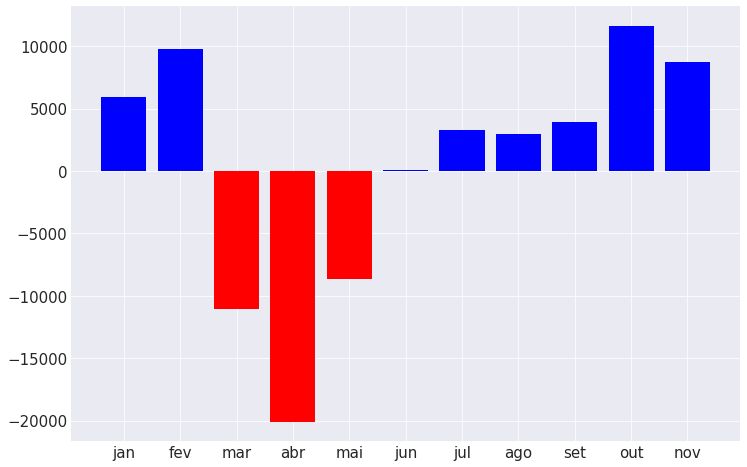

In [32]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots()
    ax.bar(mon, df_diff['diferenca'], width=0.8, color=(df_diff['diferenca']>0).map({True: 'b',
                                                            False:'r'}));

# Admissão/Desligamento por Setor
---
* Variável: secao

In [229]:
adm_setor = []
des_setor = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['secao']).size()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['secao']).size()
    adm_setor.append(a)
    des_setor.append(b)

In [231]:
adm_setor = pd.DataFrame(adm_setor, index=mon)
adm_setor = adm_setor.fillna(0)
adm_setor = adm_setor.transpose()
adm_setor["soma"] = adm_setor[mon].sum(axis=1).astype(int)

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Adm Pública,7.0,5.0,12.0,3.0,151.0,4.0,13.0,10.0,9.0,33.0,30.0,277
Administrativas,11380.0,15621.0,9468.0,5231.0,7069.0,8999.0,11440.0,10438.0,11621.0,13276.0,13370.0,117913
Agricultura/Pecuária,22.0,13.0,24.0,25.0,10.0,13.0,18.0,39.0,22.0,17.0,16.0,219
Alimentação,2232.0,2709.0,1990.0,283.0,350.0,652.0,553.0,725.0,1226.0,1876.0,1893.0,14489
Artes/Cultura,246.0,223.0,149.0,24.0,12.0,36.0,64.0,83.0,159.0,194.0,224.0,1414
Comércio,5971.0,7123.0,6356.0,2542.0,3190.0,3817.0,4129.0,5288.0,5981.0,7980.0,8175.0,60552
Construção,3429.0,3064.0,2656.0,1395.0,2343.0,3021.0,3076.0,2994.0,3320.0,3150.0,2988.0,31436
Educação,1108.0,1900.0,1129.0,135.0,146.0,180.0,219.0,396.0,405.0,459.0,411.0,6488
Eletricidade/Gás,1.0,1.0,5.0,1.0,3.0,2.0,5.0,5.0,2.0,22.0,5.0,52
Financeiros,342.0,399.0,396.0,109.0,127.0,170.0,243.0,261.0,230.0,283.0,292.0,2852


In [232]:
adm_setor = adm_setor.sort_values(by=['soma'],ascending=False)
adm_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Administrativas,11380.0,15621.0,9468.0,5231.0,7069.0,8999.0,11440.0,10438.0,11621.0,13276.0,13370.0,117913
Comércio,5971.0,7123.0,6356.0,2542.0,3190.0,3817.0,4129.0,5288.0,5981.0,7980.0,8175.0,60552
Construção,3429.0,3064.0,2656.0,1395.0,2343.0,3021.0,3076.0,2994.0,3320.0,3150.0,2988.0,31436
Ind. Transformação,1794.0,2020.0,1826.0,681.0,808.0,915.0,1257.0,1511.0,2144.0,3064.0,2552.0,18572
Profissionais,1636.0,1515.0,1129.0,481.0,702.0,809.0,997.0,1107.0,1368.0,4877.0,1626.0,16247
Alimentação,2232.0,2709.0,1990.0,283.0,350.0,652.0,553.0,725.0,1226.0,1876.0,1893.0,14489
Saúde,1223.0,1381.0,1473.0,842.0,681.0,1490.0,1797.0,1676.0,1066.0,1281.0,1331.0,14241
Informação,1160.0,1210.0,1044.0,378.0,454.0,525.0,648.0,843.0,1087.0,1177.0,1162.0,9688
Transporte,916.0,1207.0,861.0,303.0,394.0,461.0,719.0,770.0,903.0,1195.0,1142.0,8871
Educação,1108.0,1900.0,1129.0,135.0,146.0,180.0,219.0,396.0,405.0,459.0,411.0,6488


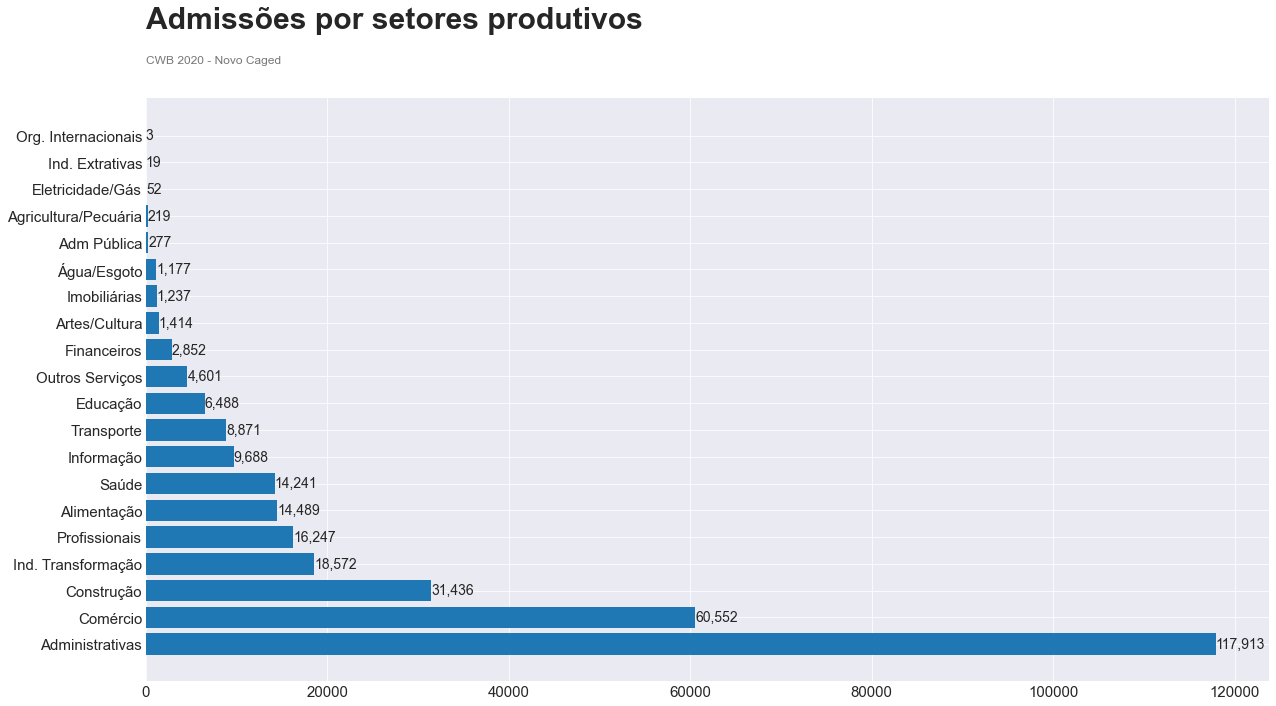

In [237]:
with plt.style.context('seaborn-darkgrid'):
    #dx = adm_setor['soma'].max() / 200
    fig, ax = plt.subplots(figsize=(18,10))
    ax.barh(adm_setor.index, adm_setor.soma, linewidth=1)
    
    for i, (value, name) in enumerate(zip(adm_setor.soma, adm_setor.index)):
        #ax.text(value-dx, i,name, size=12, weight=600, ha='right', va='bottom')
        ax.text(value, i,f'{value:,.0f}', size=14, ha='left', va='center')
   

    #ax.set_axisbelow(True)
    #ax.margins(0.01,0)
    ax.text(0, 1.12, 'Admissões por setores produtivos',
            transform=ax.transAxes, size=30, weight=600, ha='left')
    ax.text(0, 1.06, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=12, color='#777777')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            #color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    fig.tight_layout()
    ax.set_yticklabels(adm_setor.index, fontsize=15)
    plt.show()
    

# Desligamentos por Setor
---

In [234]:
des_setor = pd.DataFrame(des_setor, index=mon)
des_setor = des_setor.fillna(0)
des_setor = des_setor.transpose()
des_setor["soma"] = des_setor[mon].sum(axis=1).astype(int)
des_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Adm Pública,8.0,19.0,7.0,24.0,5.0,10.0,9.0,56.0,12.0,15.0,40.0,205
Administrativas,7461.0,9114.0,16443.0,10921.0,8286.0,6405.0,7284.0,9078.0,10872.0,10231.0,9132.0,105227
Agricultura/Pecuária,18.0,23.0,21.0,10.0,14.0,14.0,13.0,12.0,13.0,17.0,25.0,180
Alimentação,2218.0,2413.0,3328.0,3316.0,2027.0,1477.0,1249.0,1231.0,1364.0,1426.0,1257.0,21306
Artes/Cultura,224.0,241.0,275.0,248.0,220.0,171.0,168.0,141.0,160.0,149.0,143.0,2140
Comércio,6835.0,6911.0,8085.0,7364.0,5649.0,4729.0,4274.0,4700.0,4967.0,5517.0,5246.0,64277
Construção,2111.0,2278.0,2947.0,2455.0,2097.0,2329.0,2384.0,2281.0,2327.0,2802.0,2160.0,26171
Domésticos,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Educação,945.0,954.0,1050.0,799.0,889.0,612.0,1135.0,637.0,594.0,554.0,433.0,8602
Eletricidade/Gás,22.0,11.0,29.0,2.0,3.0,11.0,16.0,11.0,18.0,9.0,219.0,351


In [236]:
des_setor = des_setor.sort_values(by=['soma'],ascending=False)
des_setor

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Administrativas,7461.0,9114.0,16443.0,10921.0,8286.0,6405.0,7284.0,9078.0,10872.0,10231.0,9132.0,105227
Comércio,6835.0,6911.0,8085.0,7364.0,5649.0,4729.0,4274.0,4700.0,4967.0,5517.0,5246.0,64277
Construção,2111.0,2278.0,2947.0,2455.0,2097.0,2329.0,2384.0,2281.0,2327.0,2802.0,2160.0,26171
Alimentação,2218.0,2413.0,3328.0,3316.0,2027.0,1477.0,1249.0,1231.0,1364.0,1426.0,1257.0,21306
Ind. Transformação,1434.0,2159.0,1887.0,2119.0,1693.0,1628.0,1717.0,1118.0,1281.0,1461.0,1471.0,17968
Profissionais,1137.0,1260.0,1629.0,1074.0,821.0,782.0,742.0,874.0,895.0,1235.0,3057.0,13506
Saúde,958.0,1171.0,1291.0,1055.0,1032.0,1047.0,1037.0,1196.0,1127.0,1307.0,1177.0,12398
Transporte,1072.0,1046.0,1279.0,1559.0,1048.0,832.0,880.0,826.0,844.0,893.0,860.0,11139
Informação,874.0,919.0,992.0,831.0,655.0,572.0,585.0,799.0,743.0,862.0,939.0,8771
Educação,945.0,954.0,1050.0,799.0,889.0,612.0,1135.0,637.0,594.0,554.0,433.0,8602


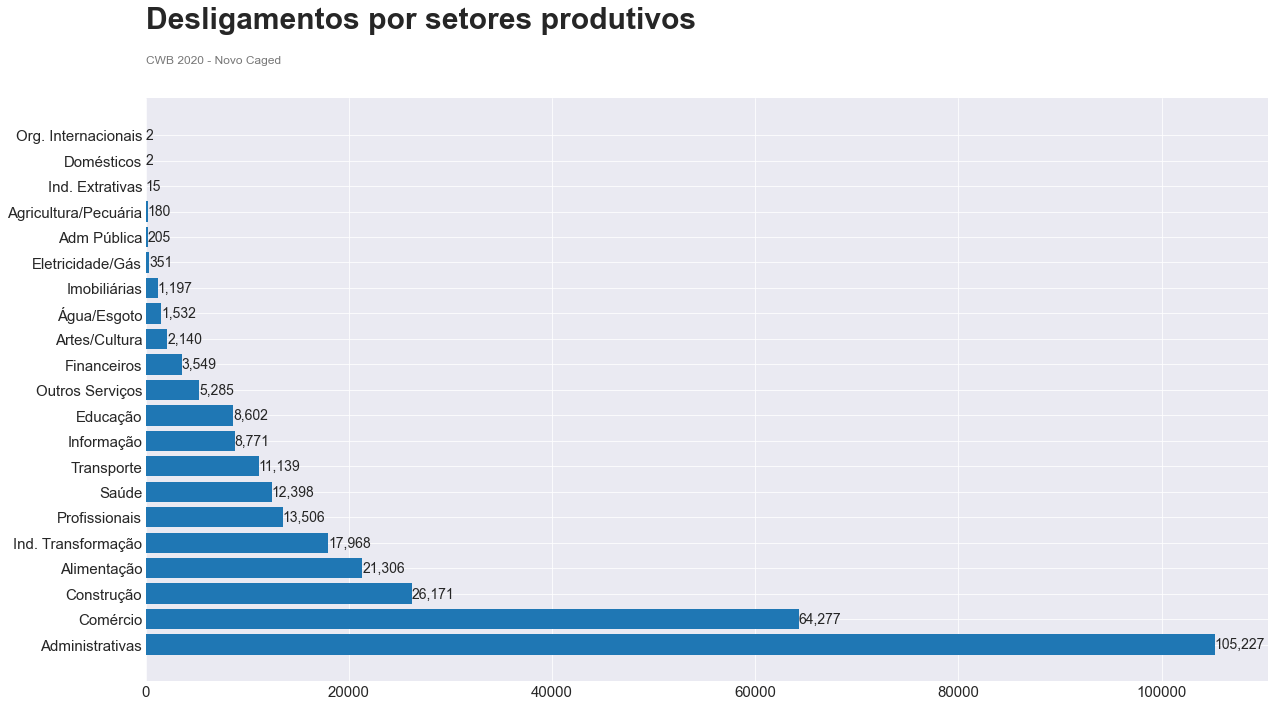

In [238]:
with plt.style.context('seaborn-darkgrid'):
    #dx = adm_setor['soma'].max() / 200
    fig, ax = plt.subplots(figsize=(18,10))
    ax.barh(des_setor.index, des_setor.soma, linewidth=1)
    
    for i, (value, name) in enumerate(zip(des_setor.soma, des_setor.index)):
        #ax.text(value-dx, i,name, size=12, weight=600, ha='right', va='bottom')
        ax.text(value, i,f'{value:,.0f}', size=14, ha='left', va='center')
   

    #ax.set_axisbelow(True)
    #ax.margins(0.01,0)
    ax.text(0, 1.12, 'Desligamentos por setores produtivos',
            transform=ax.transAxes, size=30, weight=600, ha='left')
    ax.text(0, 1.06, 'CWB 2020 - Novo Caged', transform=ax.transAxes, size=12, color='#777777')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            #color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    fig.tight_layout()
    ax.set_yticklabels(des_setor.index, fontsize=15)
    plt.show()

# Admissão/Desligamento tipo de Contrato
---
* Variável: categoria

In [240]:
data[0].head()

,municipio,secao,categoria,instrucao,genero,tipo,raca,descricao
5,410690,Comércio,CLT,Médio Completo,F,20,Parda,ADM/Reemprego
17,410690,Outros Serviços,CLT,Médio Completo,F,43,Branca,DES/Término de Contrato Determinado
48,410690,Construção,CLT,Fundamental Completo,M,20,Não Informada,ADM/Reemprego
50,410690,Comércio,CLT,Médio Completo,F,40,Não Informada,DES/A pedido
79,410690,Construção,CLT,Fundamental Completo,M,31,Não Informada,DES/Sem Justa Causa


In [267]:
adm_categoria = []
des_categoria = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['categoria']).size()
    b = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['categoria']).size()
    adm_categoria.append(a)
    des_categoria.append(b)

In [268]:
adm_categoria = pd.DataFrame(adm_categoria, index=mon)
adm_categoria = adm_categoria.fillna(0)
adm_categoria = adm_categoria.transpose()
adm_categoria["soma"] = adm_categoria[mon].sum(axis=1).astype(int)
adm_categoria

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Aprendiz,369.0,1096.0,560.0,54.0,67.0,107.0,177.0,406.0,260.0,441.0,391.0,3928
CLT,22912.0,26536.0,23112.0,9613.0,12554.0,15409.0,16751.0,20079.0,23414.0,31559.0,28037.0,229976
Contrato a Termo,825.0,720.0,733.0,473.0,799.0,947.0,961.0,840.0,1028.0,888.0,1324.0,9538
Intermitente,227.0,238.0,370.0,320.0,394.0,364.0,323.0,280.0,463.0,651.0,417.0,4047
Não Identificado,2518.0,2391.0,1687.0,789.0,841.0,1130.0,1575.0,1125.0,868.0,1048.0,887.0,14859
Temporário,5374.0,8417.0,2953.0,1549.0,2101.0,3630.0,5861.0,4002.0,4126.0,4978.0,4858.0,47849
VA/Com acordo,4.0,8.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
VA/Sem acordo,19.0,52.0,25.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129


In [269]:
adm_categoria = adm_categoria.sort_values(by=['soma'],ascending=False)
adm_categoria = adm_categoria.transpose()
adm_categoria

,CLT,Temporário,Não Identificado,Contrato a Termo,Intermitente,Aprendiz,VA/Sem acordo,VA/Com acordo
jan,22912.0,5374.0,2518.0,825.0,227.0,369.0,19.0,4.0
fev,26536.0,8417.0,2391.0,720.0,238.0,1096.0,52.0,8.0
mar,23112.0,2953.0,1687.0,733.0,370.0,560.0,25.0,8.0
abr,9613.0,1549.0,789.0,473.0,320.0,54.0,33.0,2.0
mai,12554.0,2101.0,841.0,799.0,394.0,67.0,0.0,0.0
jun,15409.0,3630.0,1130.0,947.0,364.0,107.0,0.0,0.0
jul,16751.0,5861.0,1575.0,961.0,323.0,177.0,0.0,0.0
ago,20079.0,4002.0,1125.0,840.0,280.0,406.0,0.0,0.0
set,23414.0,4126.0,868.0,1028.0,463.0,260.0,0.0,0.0
out,31559.0,4978.0,1048.0,888.0,651.0,441.0,0.0,0.0


In [270]:
adm_catgoria_ = adm_categoria.drop('soma')
adm_catgoria_

,CLT,Temporário,Não Identificado,Contrato a Termo,Intermitente,Aprendiz,VA/Sem acordo,VA/Com acordo
jan,22912.0,5374.0,2518.0,825.0,227.0,369.0,19.0,4.0
fev,26536.0,8417.0,2391.0,720.0,238.0,1096.0,52.0,8.0
mar,23112.0,2953.0,1687.0,733.0,370.0,560.0,25.0,8.0
abr,9613.0,1549.0,789.0,473.0,320.0,54.0,33.0,2.0
mai,12554.0,2101.0,841.0,799.0,394.0,67.0,0.0,0.0
jun,15409.0,3630.0,1130.0,947.0,364.0,107.0,0.0,0.0
jul,16751.0,5861.0,1575.0,961.0,323.0,177.0,0.0,0.0
ago,20079.0,4002.0,1125.0,840.0,280.0,406.0,0.0,0.0
set,23414.0,4126.0,868.0,1028.0,463.0,260.0,0.0,0.0
out,31559.0,4978.0,1048.0,888.0,651.0,441.0,0.0,0.0


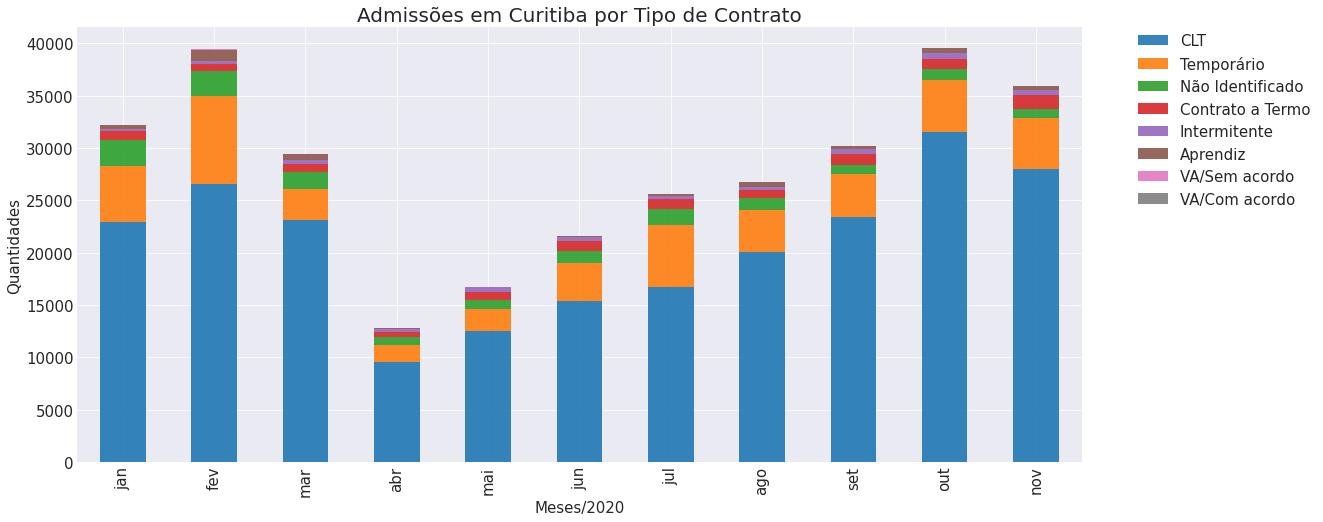

In [272]:
with plt.style.context('seaborn-darkgrid'):
    adm_catgoria_.plot(kind="bar", stacked=True, figsize=(18,8), alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Admissões em Curitiba por Tipo de Contrato", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades")
   

# Desligamentos por tipo de contrato 
---

In [274]:
des_categoria = pd.DataFrame(des_categoria, index=mon)
des_categoria = des_categoria.fillna(0)
des_categoria = des_categoria.transpose()
des_categoria["soma"] = des_categoria[mon].sum(axis=1).astype(int)
des_categoria

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,soma
Aprendiz,564.0,736.0,588.0,301.0,468.0,438.0,514.0,787.0,578.0,570.0,539.0,6083
CLT,19108.0,21394.0,26631.0,25467.0,20108.0,16610.0,17006.0,17114.0,18654.0,21199.0,21029.0,224320
Contrato a Termo,535.0,607.0,560.0,430.0,372.0,475.0,589.0,613.0,650.0,672.0,816.0,6319
Intermitente,183.0,187.0,155.0,309.0,573.0,315.0,256.0,362.0,287.0,336.0,314.0,3277
Não Identificado,3844.0,3736.0,3555.0,1952.0,1470.0,1648.0,1193.0,1190.0,1267.0,1302.0,1105.0,22262
Temporário,2102.0,3051.0,8990.0,4433.0,2378.0,1980.0,2778.0,3708.0,4829.0,3877.0,3372.0,41498
VA/Com acordo,0.0,0.0,4.0,1.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0,13
VA/Sem acordo,0.0,0.0,6.0,13.0,9.0,4.0,8.0,2.0,3.0,3.0,3.0,51


In [278]:
des_categoria = des_categoria.sort_values(by=['soma'],ascending=False)
des_categoria = des_categoria.transpose()
des_categoria

,CLT,Temporário,Não Identificado,Contrato a Termo,Aprendiz,Intermitente,VA/Sem acordo,VA/Com acordo
jan,19108.0,2102.0,3844.0,535.0,564.0,183.0,0.0,0.0
fev,21394.0,3051.0,3736.0,607.0,736.0,187.0,0.0,0.0
mar,26631.0,8990.0,3555.0,560.0,588.0,155.0,6.0,4.0
abr,25467.0,4433.0,1952.0,430.0,301.0,309.0,13.0,1.0
mai,20108.0,2378.0,1470.0,372.0,468.0,573.0,9.0,2.0
jun,16610.0,1980.0,1648.0,475.0,438.0,315.0,4.0,4.0
jul,17006.0,2778.0,1193.0,589.0,514.0,256.0,8.0,0.0
ago,17114.0,3708.0,1190.0,613.0,787.0,362.0,2.0,0.0
set,18654.0,4829.0,1267.0,650.0,578.0,287.0,3.0,2.0
out,21199.0,3877.0,1302.0,672.0,570.0,336.0,3.0,0.0


In [279]:
des_catgoria_ = des_categoria.drop('soma')
des_catgoria_

,CLT,Temporário,Não Identificado,Contrato a Termo,Aprendiz,Intermitente,VA/Sem acordo,VA/Com acordo
jan,19108.0,2102.0,3844.0,535.0,564.0,183.0,0.0,0.0
fev,21394.0,3051.0,3736.0,607.0,736.0,187.0,0.0,0.0
mar,26631.0,8990.0,3555.0,560.0,588.0,155.0,6.0,4.0
abr,25467.0,4433.0,1952.0,430.0,301.0,309.0,13.0,1.0
mai,20108.0,2378.0,1470.0,372.0,468.0,573.0,9.0,2.0
jun,16610.0,1980.0,1648.0,475.0,438.0,315.0,4.0,4.0
jul,17006.0,2778.0,1193.0,589.0,514.0,256.0,8.0,0.0
ago,17114.0,3708.0,1190.0,613.0,787.0,362.0,2.0,0.0
set,18654.0,4829.0,1267.0,650.0,578.0,287.0,3.0,2.0
out,21199.0,3877.0,1302.0,672.0,570.0,336.0,3.0,0.0


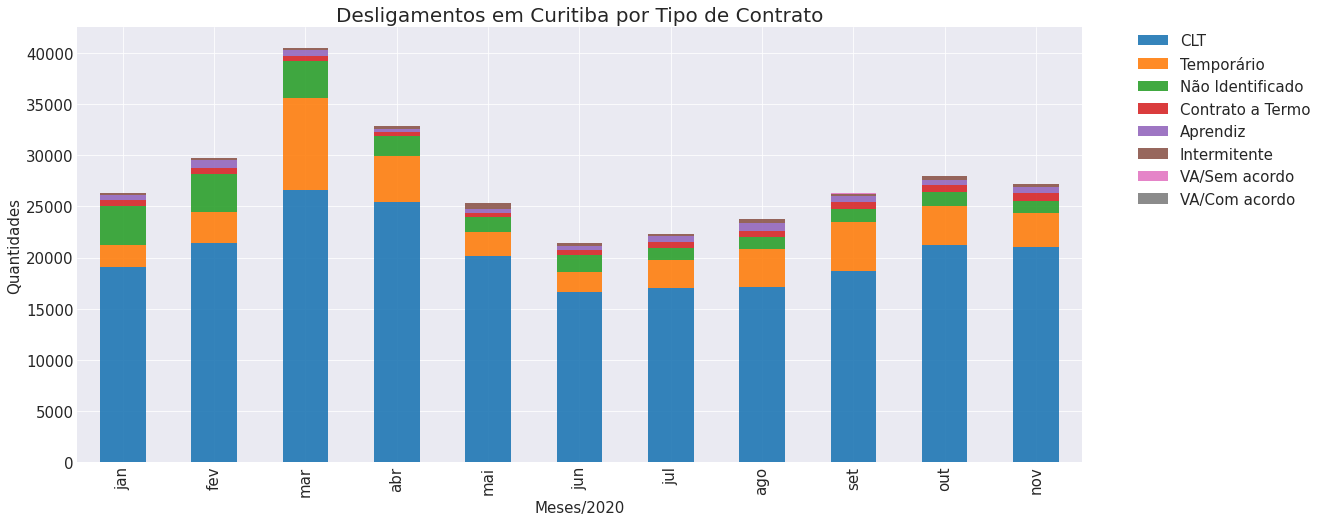

In [280]:
with plt.style.context('seaborn-darkgrid'):
    des_catgoria_.plot(kind="bar", stacked=True, figsize=(18,8), alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Desligamentos em Curitiba por Tipo de Contrato", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades")

# Admissão/Desligamento -> Motivos
---

In [63]:
adm_desc = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)].groupby(['descricao']).size()
    adm_desc.append(a)


In [64]:
columns=['ADM/Reemprego','ADM/Primeiro Emprego','ADM/Prazo Determinado','ADM/Reintegração']
adm_desc = pd.DataFrame(adm_desc, index=mon, columns=columns)
adm_desc

,ADM/Reemprego,ADM/Primeiro Emprego,ADM/Prazo Determinado,ADM/Reintegração
jan,30459,1664,113,12
fev,37322,2023,90,23
mar,27957,1421,48,22
abr,12202,566,40,25
mai,15902,714,111,29
jun,20811,642,102,32
jul,24271,884,469,24
ago,25618,1004,87,23
set,29030,1076,25,28
out,37953,1540,50,22


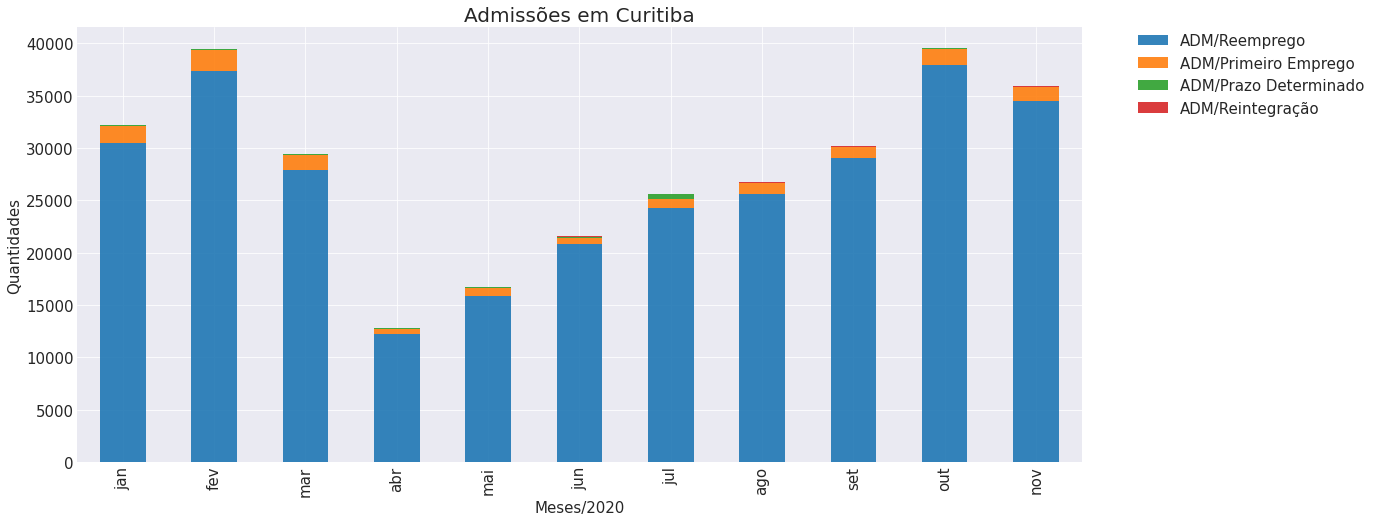

In [65]:
with plt.style.context('seaborn-darkgrid'):
    adm_desc.plot(kind="bar", stacked=True, figsize=(18,8), alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Admissões em Curitiba", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades")
   

In [314]:
des_desc = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)].groupby(['descricao']).size()
    des_desc.append(d)


In [315]:
cols = ['DES/Sem Justa Causa',
        'DES/A pedido',
        'DES/Término de Contrato Determinado',
        'DES/Acordo',
        'DES/Justa Causa',
        'DES/Término de Contrato',
        'DES/Não Identificado',
        'DES/Morte',
        'DES/Culpa Recíproca',
        'DES/Aposentadoria']
des_desc = pd.DataFrame(des_desc, columns=cols, index=mon)
#des_desc = des_desc.drop(columns='DES/Tipo Ignorado')
des_desc

,DES/Sem Justa Causa,DES/A pedido,DES/Término de Contrato Determinado,DES/Acordo,DES/Justa Causa,DES/Término de Contrato,DES/Não Identificado,DES/Morte,DES/Culpa Recíproca,DES/Aposentadoria
jan,10100,9148,5223,534,487,487,263,55,28,11
fev,12178,9493,5835,654,424,789,239,62,22,15
mar,17893,8286,12226,727,413,403,428,70,30,13
abr,19518,4080,8048,469,332,232,70,72,79,5
mai,15420,3809,5109,344,294,252,59,68,18,7
jun,11474,5026,3979,359,268,129,140,79,16,3
jul,10914,6158,4274,368,288,108,76,134,20,4
ago,9757,7346,5619,480,263,72,95,117,16,10
set,9216,8825,6712,686,340,243,101,120,18,9
out,10253,10444,5832,600,322,212,189,74,12,21


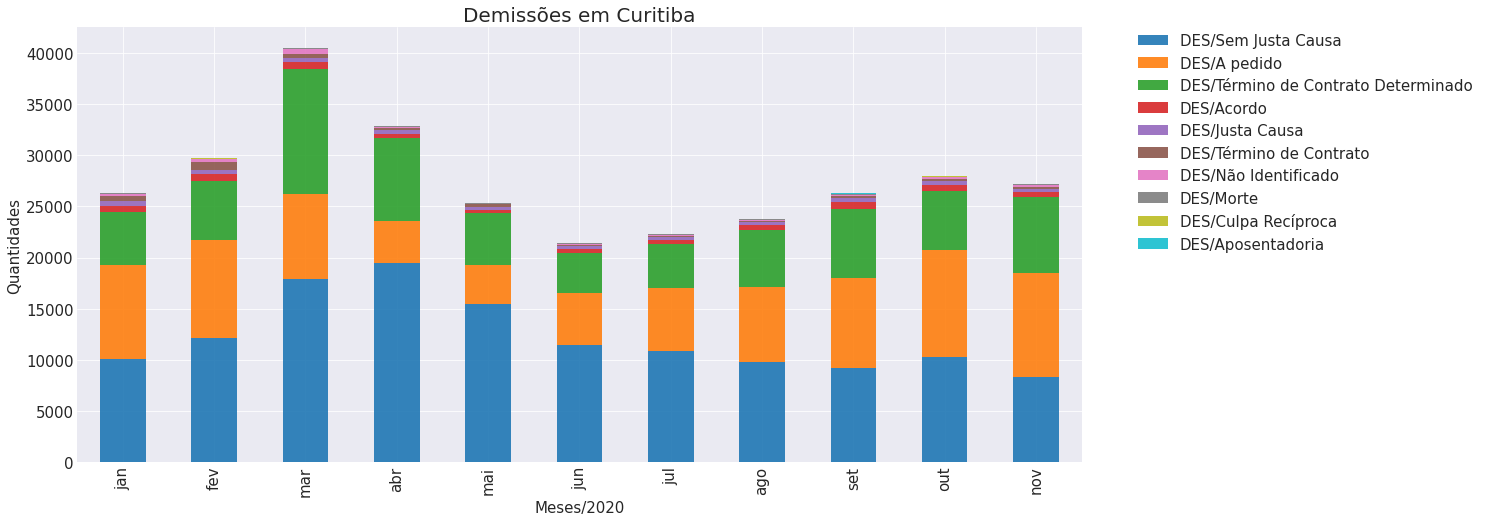

In [316]:
with plt.style.context('seaborn-darkgrid'):
    des_desc.plot(kind="bar", stacked=True, figsize=(18,8), alpha=0.9)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    plt.title("Demissões em Curitiba", fontsize=20)
    plt.xlabel("Meses/2020")
    plt.ylabel("Quantidades");

# Admissão Desligamento: Grau de Instrução
---

# Distribuição por gênero
---

In [ ]:
data[0]

# Admissões por gênero
---
* Variável: genero

In [281]:
gene_adm = []
for i in range(len(data)):
    a = data[i][data[i]['descricao'].str.contains('ADM', regex=False)]['genero'].value_counts()
    gene_adm.append(a)


In [282]:
gene_adm = pd.DataFrame(gene_adm, index=mon)
gene_adm

,M,F
jan,18393,13855
fev,22236,17222
mar,16346,13102
abr,7237,5596
mai,9602,7154
jun,12612,8975
jul,15394,10254
ago,15510,11222
set,17508,12651
out,21943,17622


In [283]:
gene_adm.M.values

array([18393, 22236, 16346,  7237,  9602, 12612, 15394, 15510, 17508,
       21943, 20116], dtype=int64)

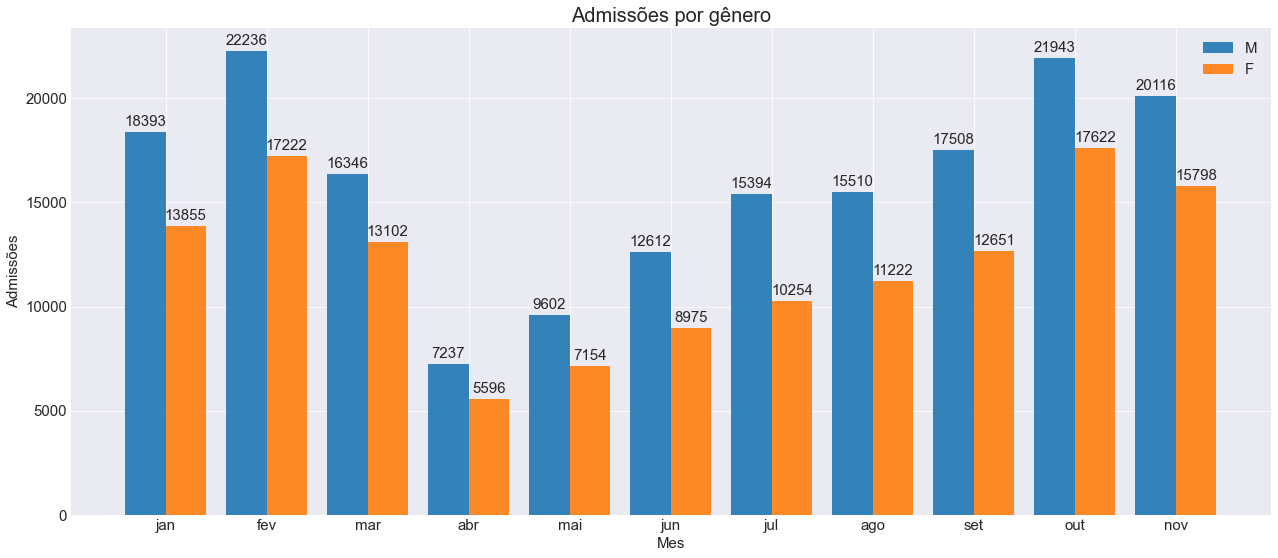

In [318]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, gene_adm.M.values, width, label='M', alpha=0.9)
    rects2 = ax.bar(x+width/2, gene_adm.F.values, width, label='F', alpha=0.9)
    
    ax.set_ylabel('Admissões')
    ax.set_title('Admissões por gênero', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=15,
                        ha='center',
                        va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

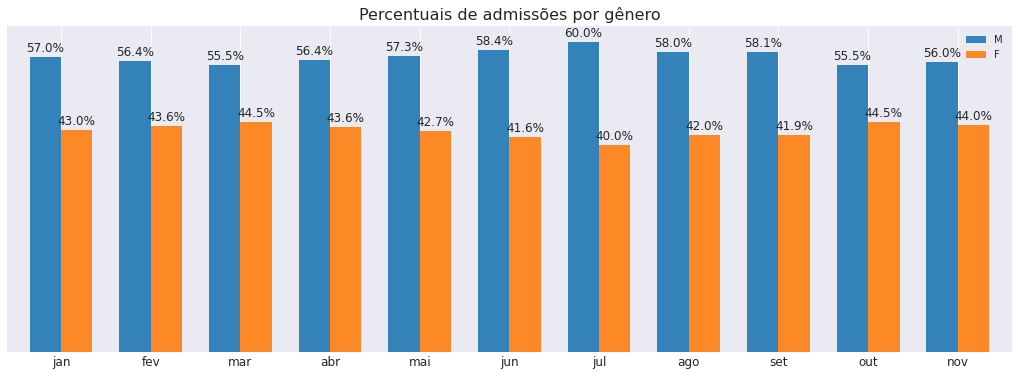

In [303]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_adm.div(gene_adm.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,6),width = 0.7,edgecolor=None, alpha=0.9)
    plt.legend(labels=gene_adm.columns,fontsize= 10)
    plt.title("Percentuais de admissões por gênero",fontsize= 16)

    plt.xticks(fontsize=12, rotation=0)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center',
                   size=12)
        

# Demissões por gênero
---

In [294]:
gene_dem = []
for i in range(len(data)):
    d = data[i][data[i]['descricao'].str.contains('DES', regex=False)]['genero'].value_counts()
    gene_dem.append(d)


In [295]:
gene_dem = pd.DataFrame(gene_dem, index=mon)
gene_dem

,M,F
jan,14061,12275
fev,16245,13466
mar,23277,17212
abr,18259,14647
mai,13584,11796
jun,12225,9249
jul,12860,9484
ago,13474,10302
set,15396,10874
out,16025,11934


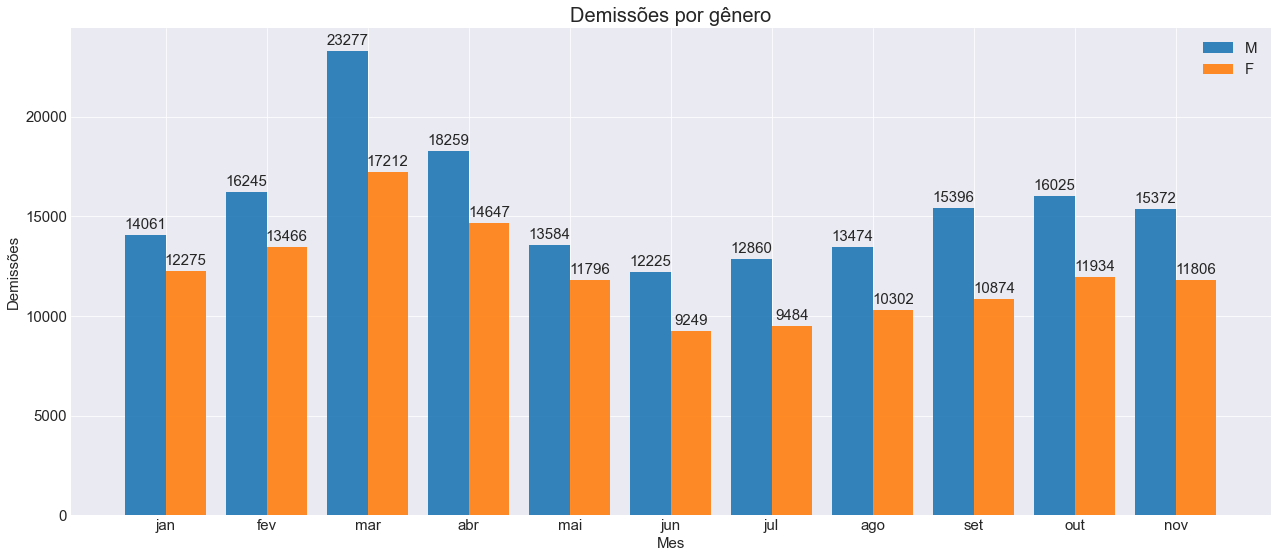

In [317]:
with plt.style.context('seaborn-darkgrid'):
    x = np.arange(len(mon))
    width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))
    rects1 = ax.bar(x-width/2, gene_dem.M.values, width, label='M', alpha=0.9)
    rects2 = ax.bar(x+width/2, gene_dem.F.values, width, label='F', alpha=0.9)
    
    ax.set_ylabel('Demissões')
    ax.set_title('Demissões por gênero', fontsize=20)
    ax.set_xlabel('Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(mon, fontsize=15)
    ax.legend()
 
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=15,
                        ha='center', va='bottom'),
                        
    autolabel(rects1)
    autolabel(rects2)
           
    fig.tight_layout()

    plt.show()

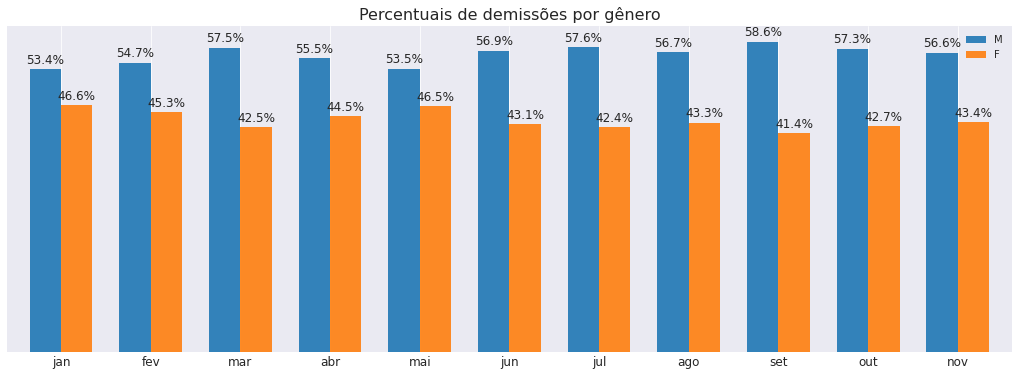

In [302]:
with plt.style.context('seaborn-darkgrid'):
    result_pct = gene_dem.div(gene_dem.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(18,6),width = 0.7,edgecolor=None, alpha=0.9)
    plt.legend(labels=gene_dem.columns,fontsize= 10)
    plt.title("Percentuais de demissões por gênero",fontsize= 16)

    plt.xticks(fontsize=12, rotation=0)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()  
        ax.annotate('{:.1%}'.format(height), 
                    (p.get_x()+.5*width, p.get_y() + height + 0.01), 
                    ha = 'center',
                   size=12)

# Difrença por Gênero
---

In [309]:
diff_gen_M = gene_adm.M.values - gene_dem.M.values
diff_gen_M

array([  4332,   5991,  -6931, -11022,  -3982,    387,   2534,   2036,
         2112,   5918,   4744], dtype=int64)

In [310]:
diff_gen_F = gene_adm.F.values - gene_dem.F.values
diff_gen_F

array([ 1580,  3756, -4110, -9051, -4642,  -274,   770,   920,  1777,
        5688,  3992], dtype=int64)

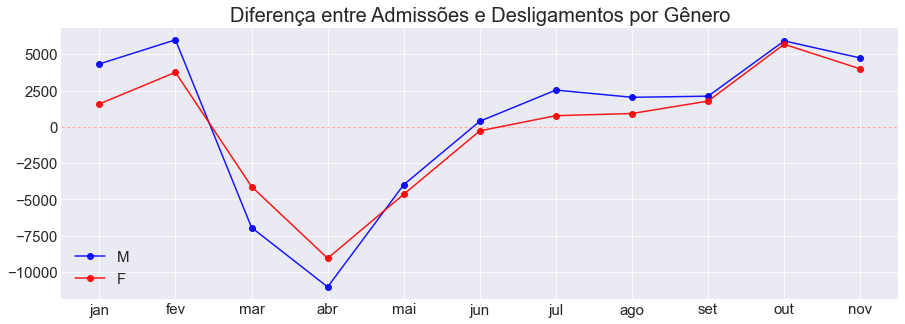

In [313]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(mon, diff_gen_M, marker='o', alpha=0.9, color='blue', label='M')
    ax.plot(mon, diff_gen_F, marker='o', alpha=0.9, color='red', label='F')
    ax.axhline(0, color='red', lw=1, ls='--', alpha=0.3)
    ax.legend()
    plt.title('Diferença entre Admissões e Desligamentos por Gênero', fontsize=20)
     
    plt.show()

# Admissão/Desligamento Raça
---